In [25]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt

#5 main categories from the dataset
categories = ['comp.graphics', 'rec.sport.baseball', 'sci.med', 'talk.politics.mideast', 'misc.forsale']

newsgroup_data = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))


X_train, X_test, y_train, y_test = train_test_split(newsgroup_data.data, newsgroup_data.target, test_size=0.2, random_state=42)


In [10]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
count_vectorizer = CountVectorizer(stop_words='english', max_features=2000)

In [11]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

In [14]:
logit = LogisticRegression(max_iter=1000)
svm = SVC()

logit.fit(X_train_tfidf, y_train)
y_pred_tfidf_logit = logit.predict(X_test_tfidf)

logit.fit(X_train_count, y_train)
y_pred_count_logit = logit.predict(X_test_count)

svm.fit(X_train_tfidf, y_train)
y_pred_tfidf_svm = svm.predict(X_test_tfidf)

svm.fit(X_train_count, y_train)
y_pred_count_svm = svm.predict(X_test_count)

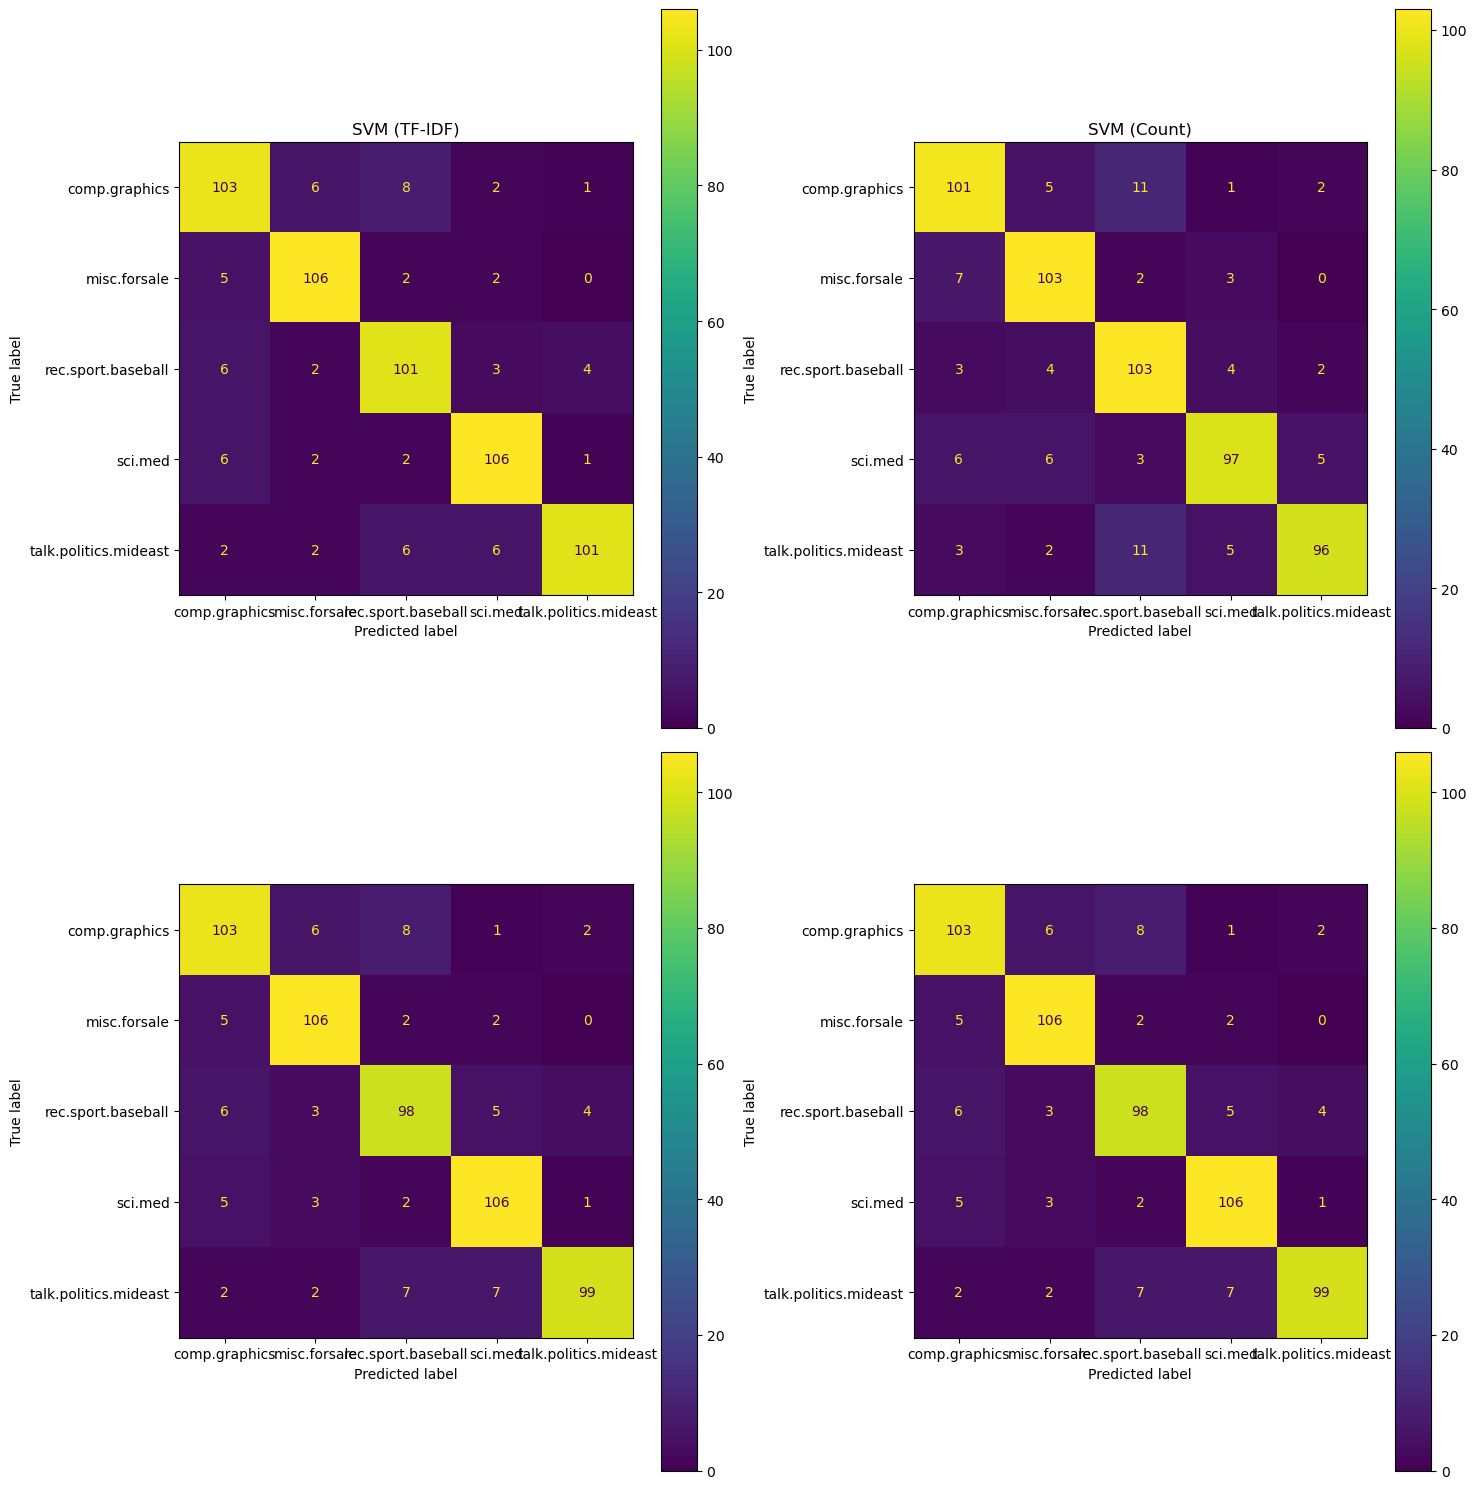

In [22]:
fig, ax = plt.subplots(2,2, figsize=(15,15))

cm_tfidf_logit = confusion_matrix(y_test, y_pred_tfidf_logit)
ConfusionMatrixDisplay(cm_tfidf_logit, display_labels=newsgroup_data.target_names).plot(ax=ax[0,0], values_format='d')
ax[0,0].set_title('Logit (TF-IDF)')

cm_count_logit = confusion_matrix(y_test, y_pred_count_logit)
ConfusionMatrixDisplay(cm_count_logit, display_labels=newsgroup_data.target_names).plot(ax=ax[0,1], values_format='d')                                 
ax[0,1].set_title('Logit (Count)')

cm_tfidf_svm = confusion_matrix(y_test, y_pred_tfidf_svm)
ConfusionMatrixDisplay(cm_tfidf_svm, display_labels=newsgroup_data.target_names).plot(ax=ax[1,0], values_format='d')                                  
ax[0,0].set_title('SVM (TF-IDF)')

cm_count_svm = confusion_matrix(y_test, y_pred_count_svm)
ConfusionMatrixDisplay(cm_tfidf_svm, display_labels=newsgroup_data.target_names).plot(ax=ax[1,1], values_format='d')                                 
ax[0,1].set_title('SVM (Count)')

plt.tight_layout()
plt.show()

In [23]:
accuracy_t_l = accuracy_score(y_test, y_pred_tfidf_logit)
accuracy_c_l = accuracy_score(y_test, y_pred_count_logit)
accuracy_t_s = accuracy_score(y_test, y_pred_tfidf_svm)
accuracy_c_s = accuracy_score(y_test, y_pred_count_svm)

In [26]:
print(classification_report(y_test, y_pred_tfidf_logit))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       120
           1       0.90      0.92      0.91       115
           2       0.85      0.87      0.86       116
           3       0.89      0.91      0.90       117
           4       0.94      0.86      0.90       117

    accuracy                           0.88       585
   macro avg       0.89      0.88      0.88       585
weighted avg       0.89      0.88      0.88       585



In [30]:
data_count ={'Classifier':['Logit','SVM'],
            'Accuracy': [accuracy_c_l, accuracy_c_s]}
data_tfidf = {'Classifier':['Logit','SVM'],
            'Accuracy': [accuracy_t_l, accuracy_t_s]}

<Axes: xlabel='Classifier'>

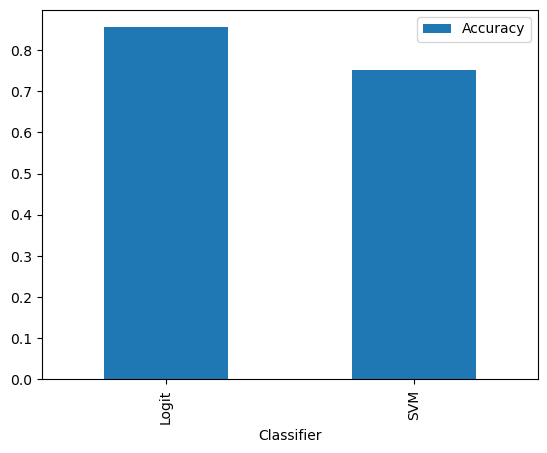

In [28]:
pd.DataFrame(data_count).plot(kind='bar', x='Classifier', y='Accuracy')

<Axes: xlabel='Classifier'>

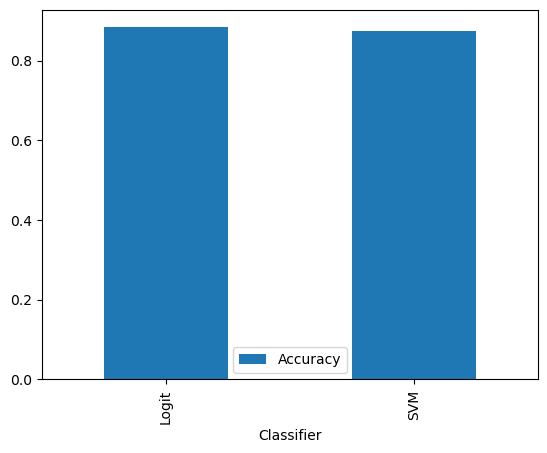

In [31]:
pd.DataFrame(data_tfidf).plot(kind='bar', x='Classifier', y='Accuracy')